##### Air Quality prediction

In [1]:
# import required libraries

In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")



In [3]:
# read the dataset aqi-data.csv

data = pd.read_csv('aqi-data.csv',encoding='unicode_escape')

In [4]:
# loading the dataset

data.head(20)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
5,152.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,NaN,1990-03-01
6,150.0,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,NaN,1990-04-01
7,151.0,April - M041990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,8.7,NaN,NaN,NaN,NaN,1990-04-01
8,152.0,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,NaN,1990-04-01
9,151.0,May - M051990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.0,8.9,NaN,NaN,NaN,NaN,1990-05-01


In [5]:
data.shape


(435742, 13)

In [6]:
# in the above we see there are 435742 rows and 13 columns in the data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [8]:
data.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [9]:
# there are so many missing values in the dataset , we need to clean these missing values

In [10]:
data.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [11]:
# here we see all the statistical values of the numerical features in the dataset

In [12]:
data.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

stn_code (station code) sampling_date (date of sample collection) state (Indian State) location (location of sample collection) agency type (type of area) so2 (sulphur dioxide concentration) no2 (nitrogen dioxide concentration) rspm (respirable suspended particualte matter concentration) spm (suspended particulate matter) location_monitoring_station pm2_5 (particulate matter 2.5) date (date)

In [13]:
data.nunique()

stn_code                        803
sampling_date                  5485
state                            37
location                        304
agency                           64
type                             10
so2                            4197
no2                            6864
rspm                           6065
spm                            6668
location_monitoring_station     991
pm2_5                           433
date                           5067
dtype: int64

##### Data Visualization

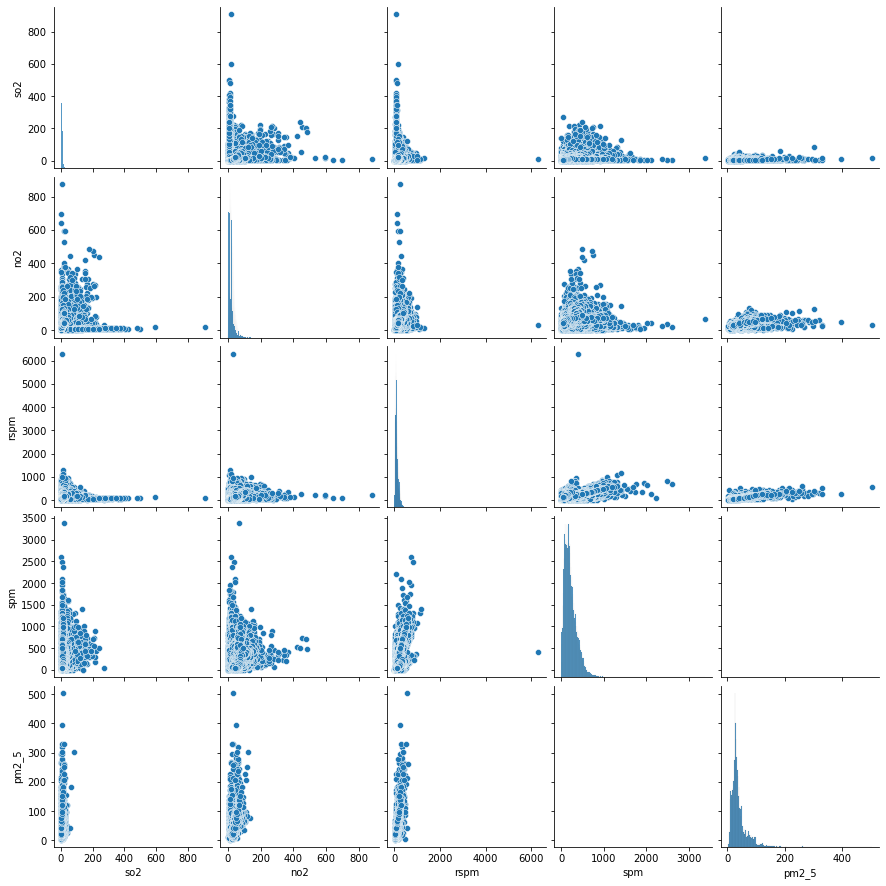

In [14]:

sns.pairplot(data=data)

In [15]:
data['state'].value_counts()

# display the count of values in the state column

Maharashtra                    60384
Uttar Pradesh                  42816
Andhra Pradesh                 26368
Punjab                         25634
Rajasthan                      25589
Kerala                         24728
Himachal Pradesh               22896
West Bengal                    22463
Gujarat                        21279
Tamil Nadu                     20597
Madhya Pradesh                 19920
Assam                          19361
Odisha                         19279
Karnataka                      17119
Delhi                           8551
Chandigarh                      8520
Chhattisgarh                    7831
Goa                             6206
Jharkhand                       5968
Mizoram                         5338
Telangana                       3978
Meghalaya                       3853
Puducherry                      3785
Haryana                         3420
Nagaland                        2463
Bihar                           2275
Uttarakhand                     1961
J

[]

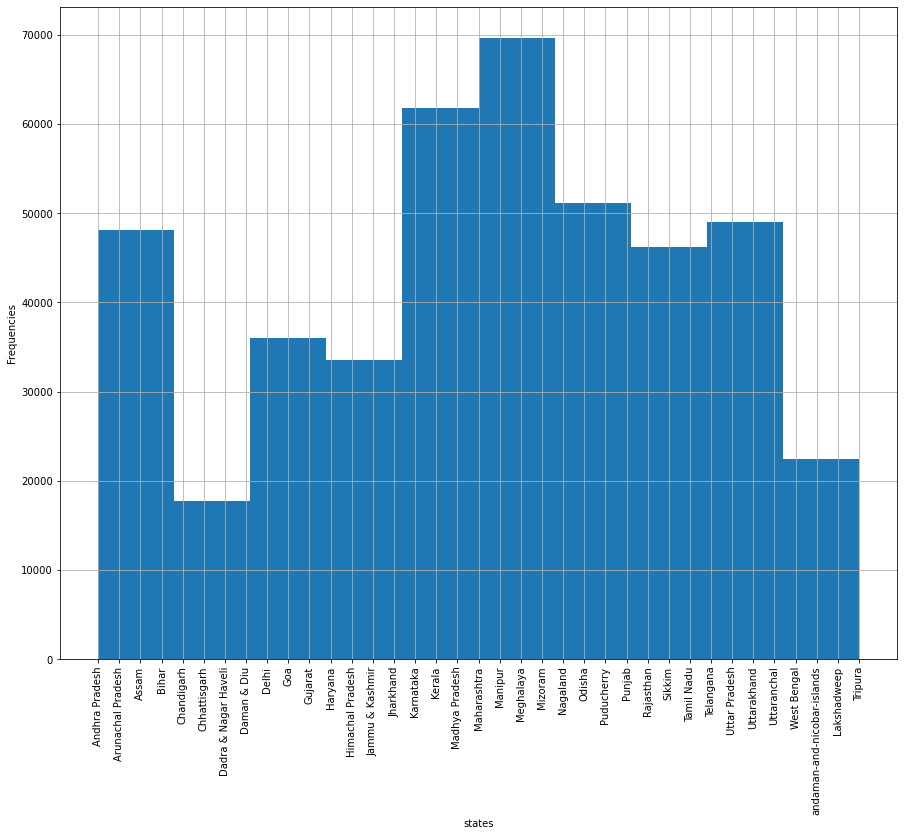

In [16]:
plt.figure(figsize=(15,12))

data['state'].hist()

plt.xlabel('states')

plt.ylabel('Frequencies')

plt.xticks(rotation=90)
plt.plot()


In [17]:
# The visualization shows us the count of states present in the dataset.

In [18]:
data.type.value_counts()


# Viewing the count of values present in the 'type' column

Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

[]

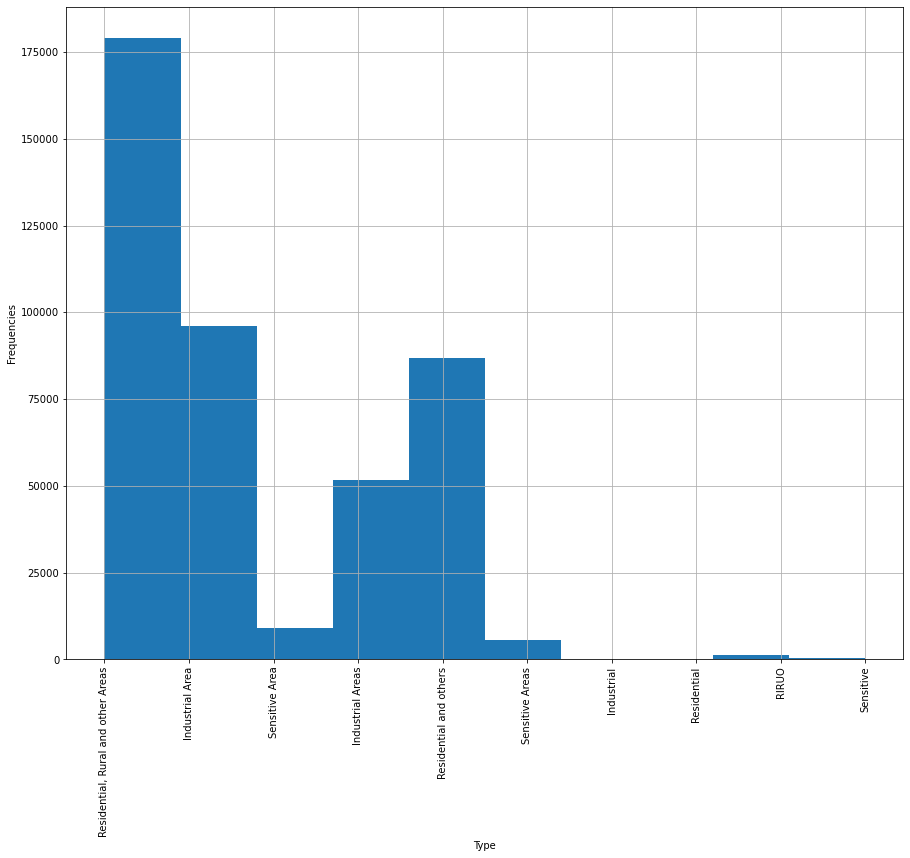

In [19]:
plt.figure(figsize=(15,12 ))

data.type.hist()

plt.xlabel('Type')
plt.ylabel('Frequencies')

plt.xticks(rotation=90)

plt.plot()

# The visualization shows us the count of Types present in the dataset.


In [20]:
data['agency'].value_counts()


# Viewing the counts of values present in the 'agency' column

Maharashtra State Pollution Control Board                                 27857
Uttar Pradesh State Pollution Control Board                               22686
Andhra Pradesh State Pollution Control Board                              19139
Himachal Pradesh State Environment Proection & Pollution Control Board    15287
Punjab State Pollution Control Board                                      15232
                                                                          ...  
Arunachal Pradesh State Pollution Control Board                              90
TNPC                                                                         82
RPCB                                                                         63
VRCE                                                                         61
RJPB                                                                         53
Name: agency, Length: 64, dtype: int64

[]

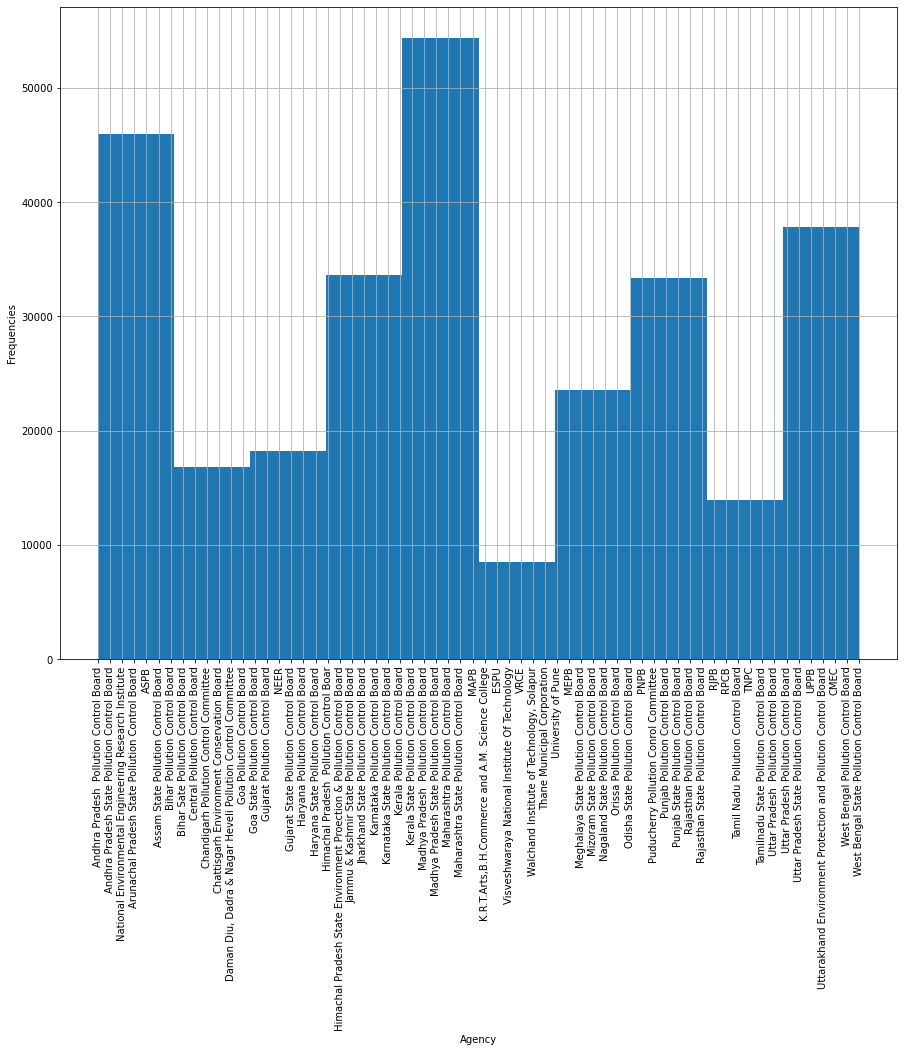

In [21]:
plt.figure(figsize=(15, 12))

data.agency.hist()

plt.xlabel('Agency')
plt.ylabel('Frequencies')

plt.xticks(rotation=90)

plt.plot()


# The visualization shows us the count of Agency present in the dataset.


<AxesSubplot:xlabel='state', ylabel='so2'>

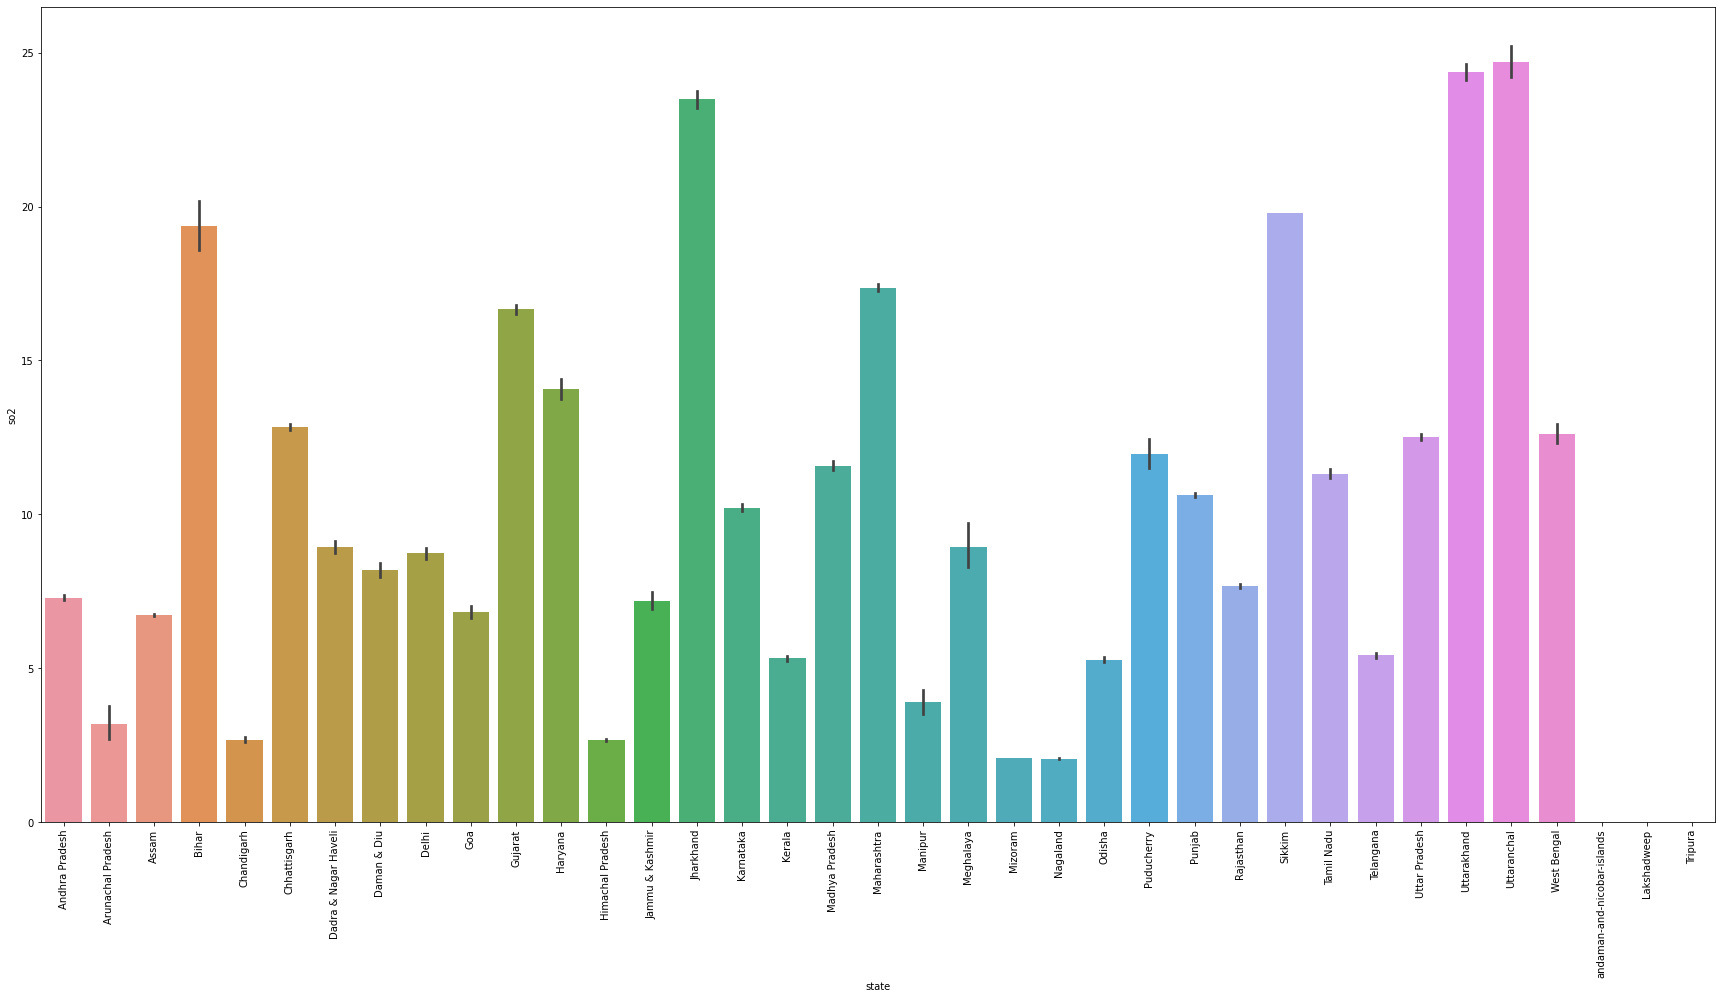

In [22]:
plt.figure(figsize=(30, 15))
plt.xticks(rotation=90)
sns.barplot(x='state',y='so2',data=data)

# This visualization shows the name of the state having higher so2 levels in 
# the air which is Uttaranchal followed by Uttarakhand

In [23]:
plt.rcParams['figure.figsize']=(30,15)

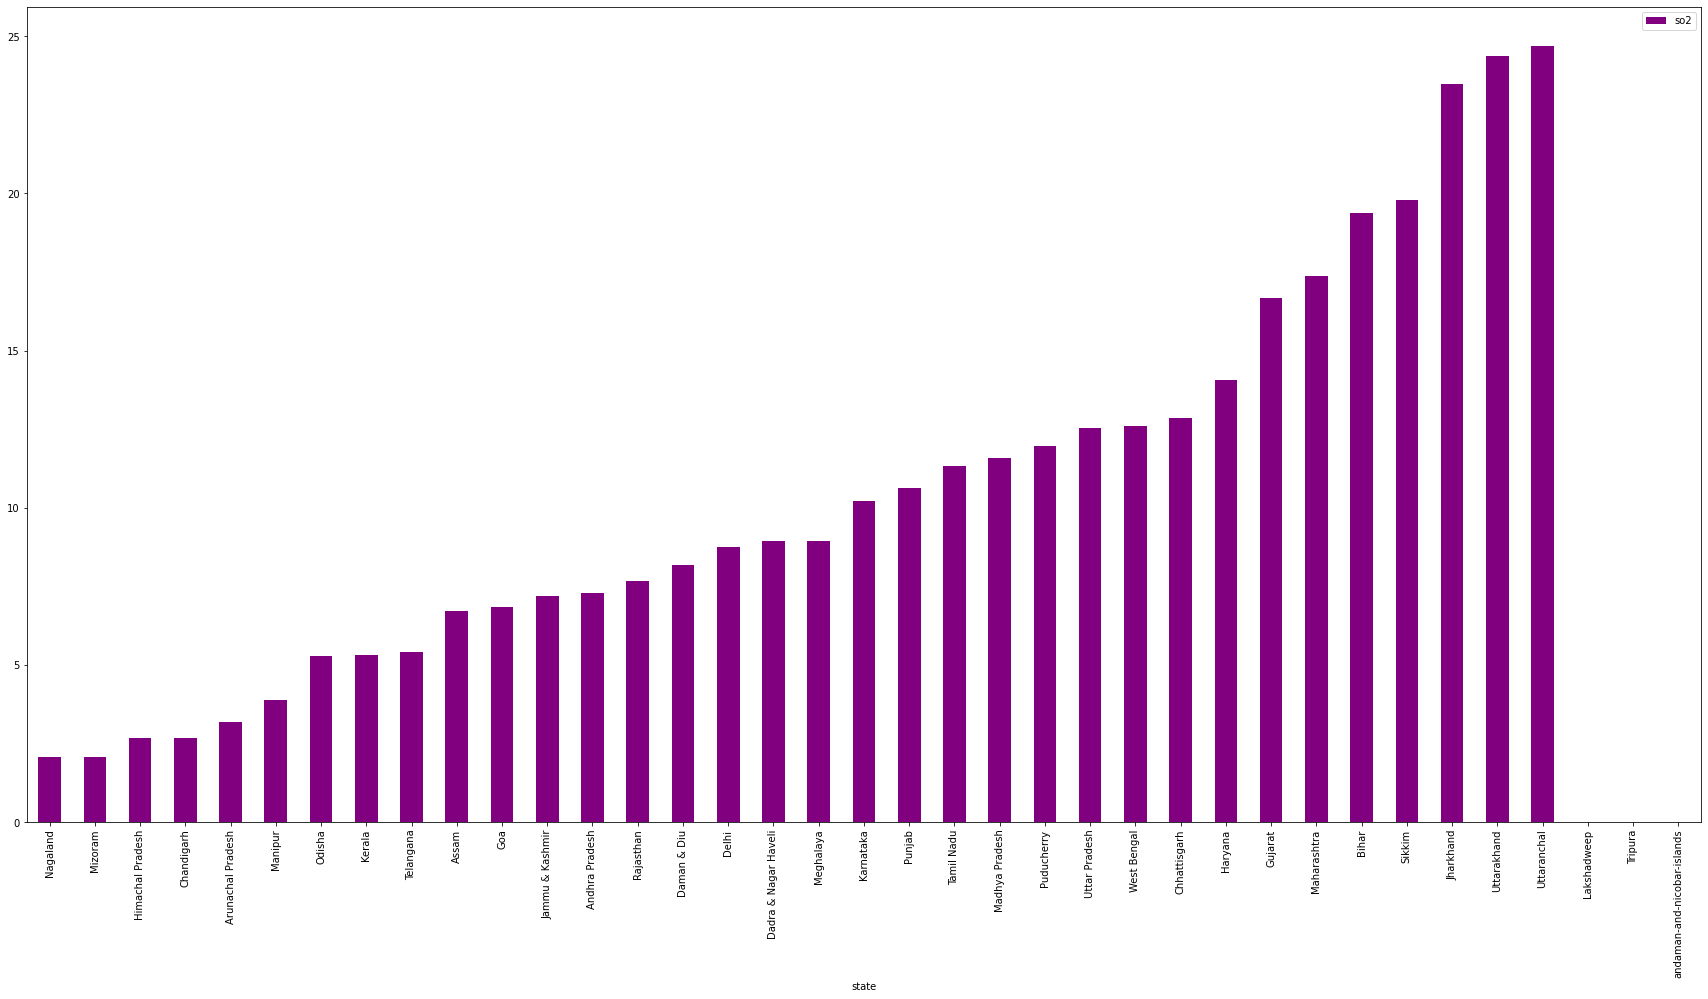

In [24]:
data[['so2','state']].groupby(["state"]).mean().sort_values(by='so2').plot.bar(color='purple')
plt.show()

# We can use the groupby function to sort values in an ascending order based on the x-axis, y-axis and its keys
# Below we get a clear picture of the states in an increasing order based on their so2 levels.

<AxesSubplot:xlabel='state', ylabel='no2'>

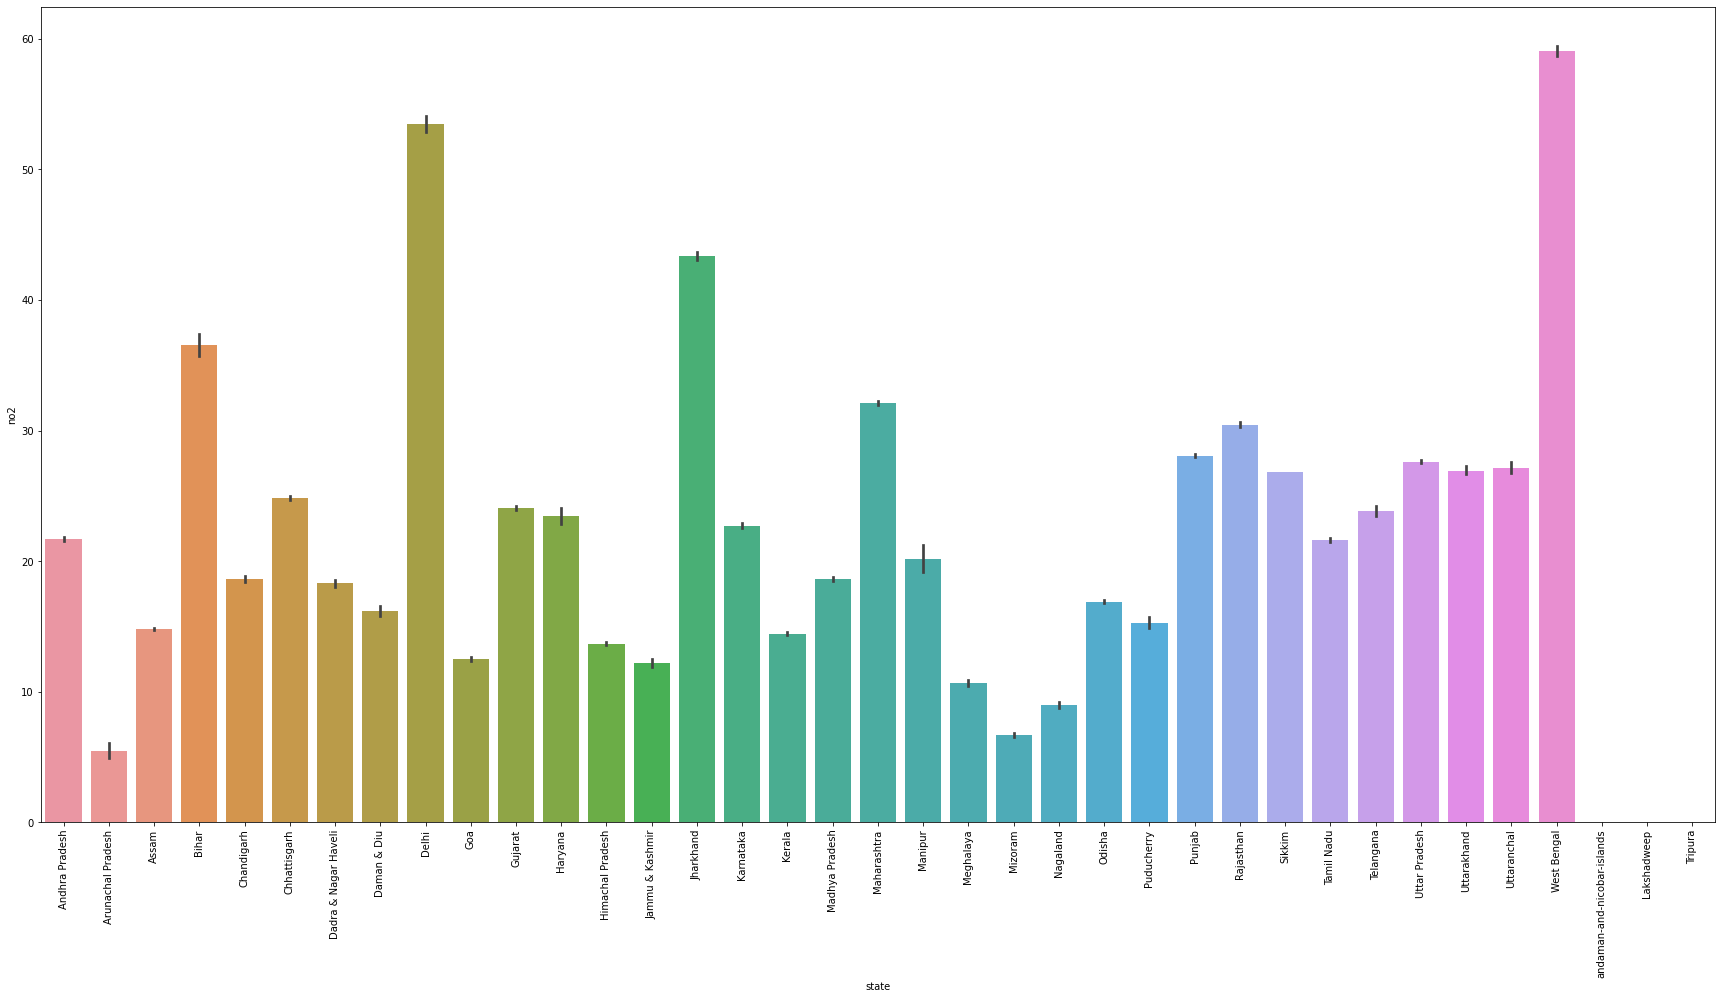

In [25]:
plt.figure(figsize=(30, 15))
plt.xticks(rotation=90)

sns.barplot(x='state',y='no2',data=data)


# West bengal has a higher no2 level compared to other states 

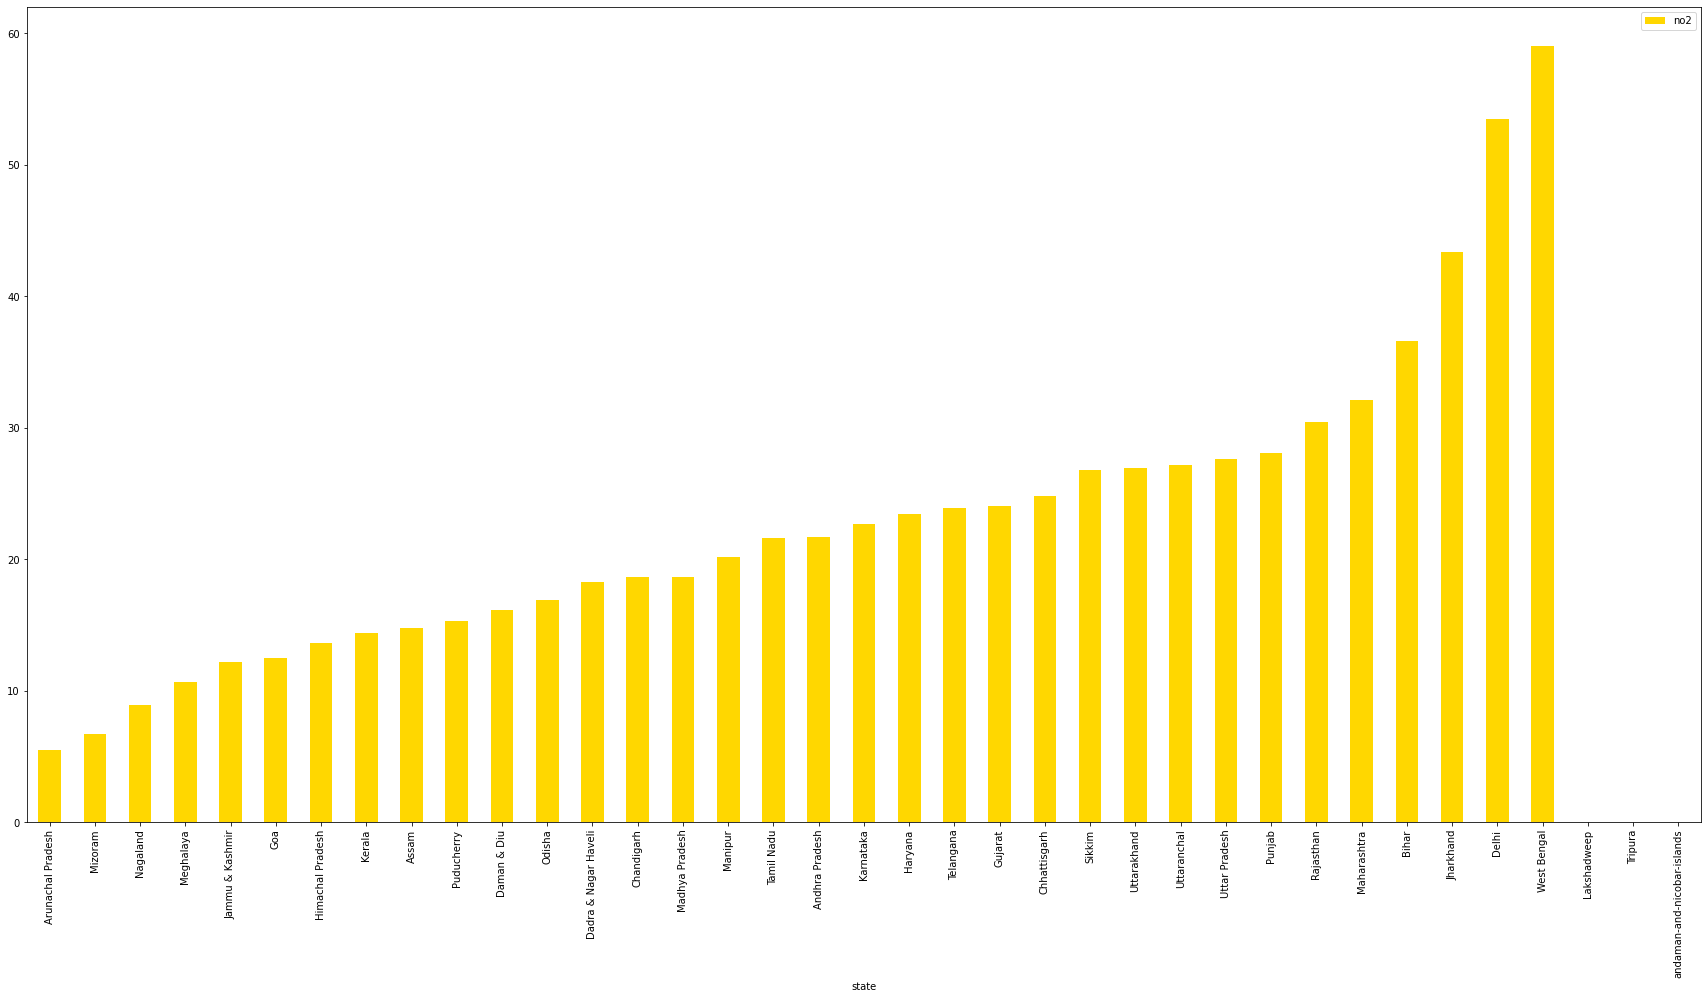

In [26]:
data[['no2','state']].groupby(["state"]).mean().sort_values(by='no2').plot.bar(color='gold')

plt.show()

# We can also use the groupby function to sort values in an ascending order based on the x axis, y axis and 
# its keys Below we get a clear picture of the states in an increasing order based on their no2 levels.

<AxesSubplot:xlabel='state', ylabel='rspm'>

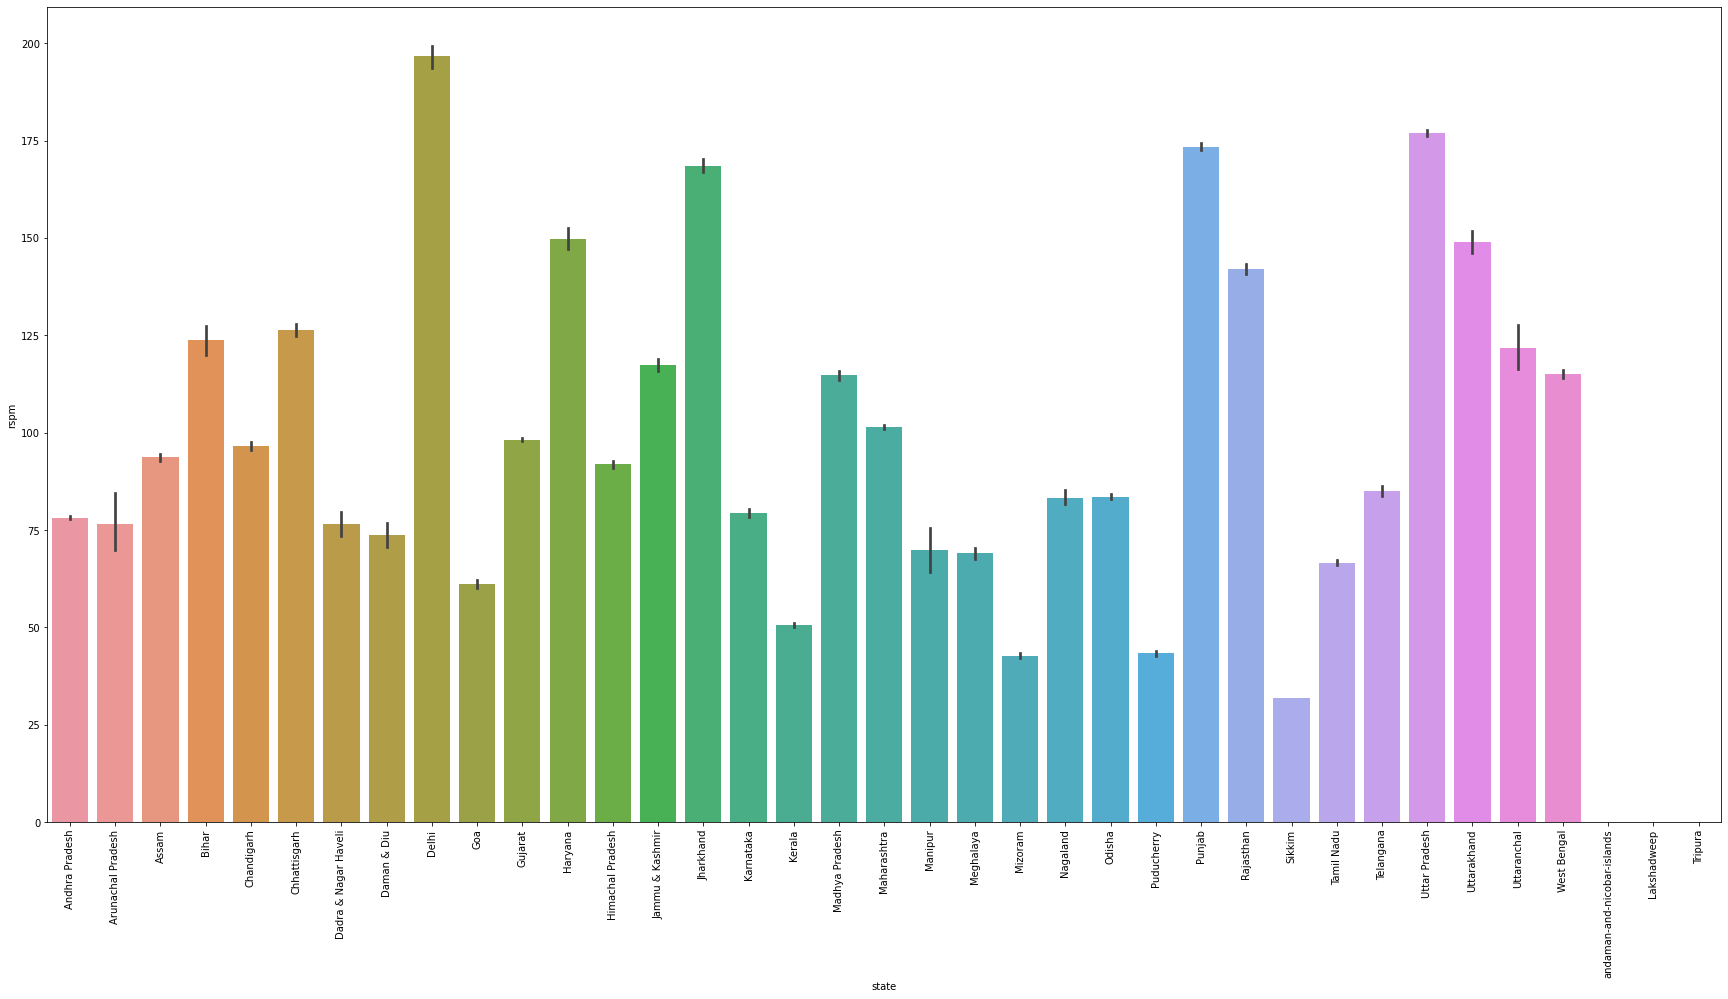

In [27]:
plt.figure(figsize=(30, 15))
plt.xticks(rotation=90)

sns.barplot(x='state',y='rspm',data=data)

# Delhi has higher rspm level compared to other states 

<AxesSubplot:xlabel='state', ylabel='spm'>

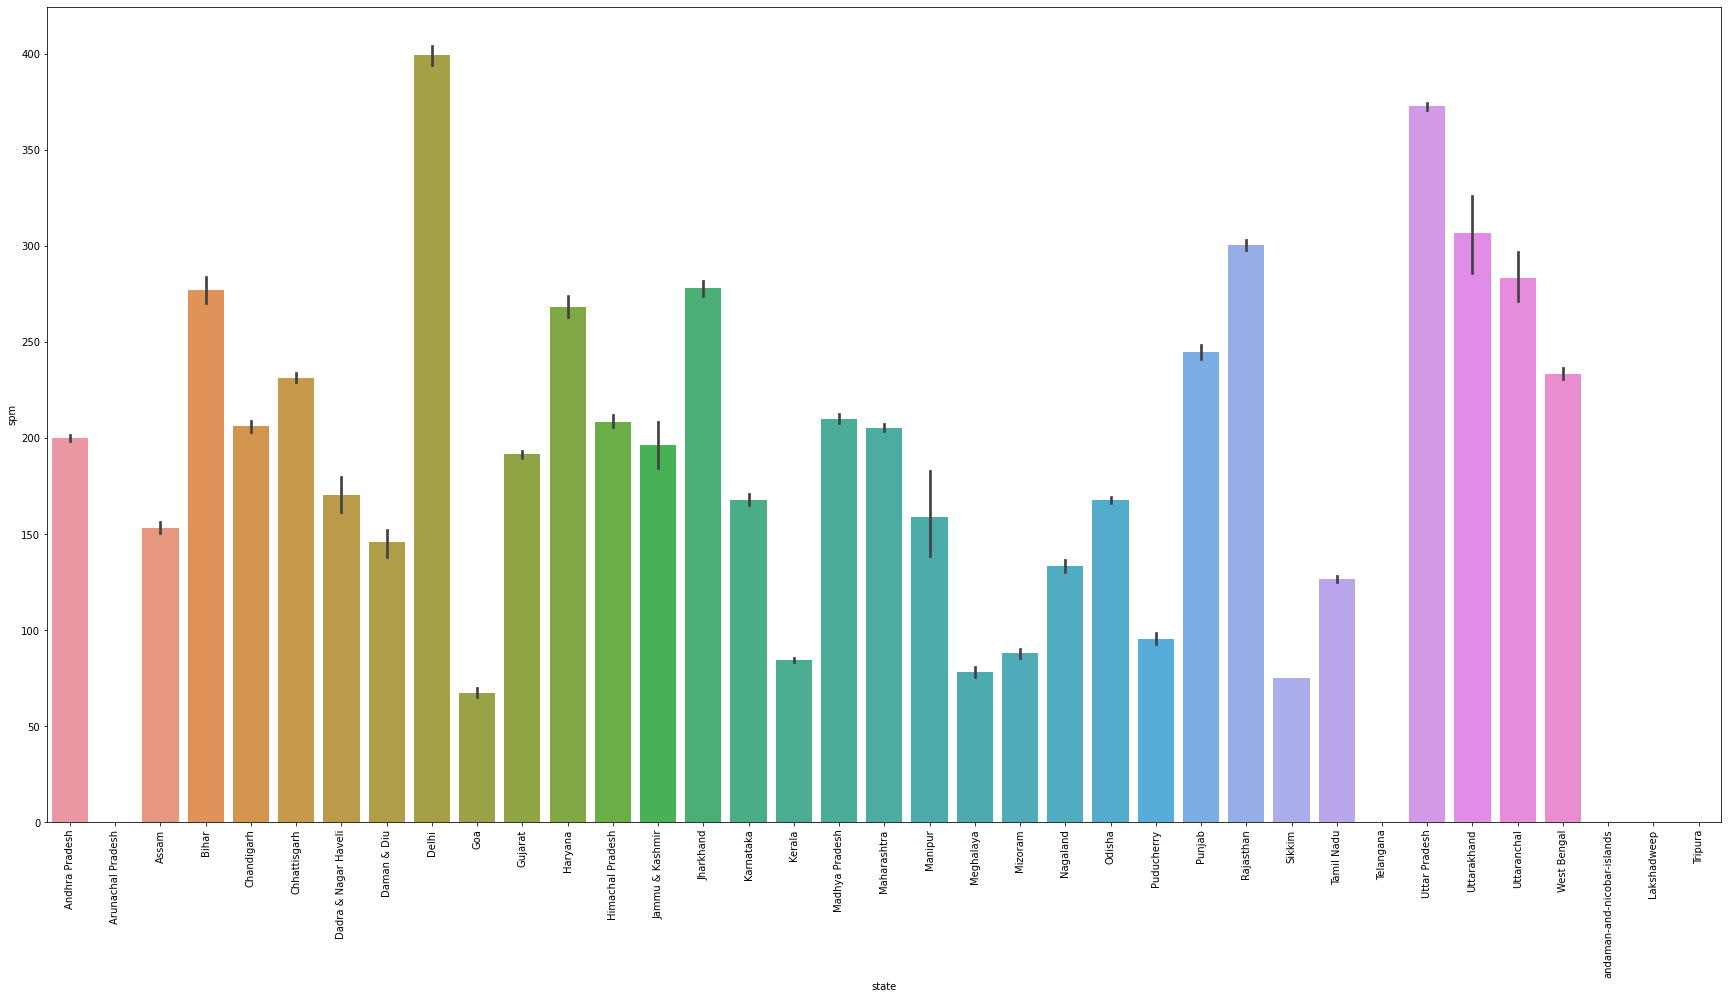

In [28]:
plt.figure(figsize=(30, 15))
plt.xticks(rotation=90)

sns.barplot(x='state',y='spm',data=data)

# Delhi has higher spm level compared to other states 

<AxesSubplot:xlabel='state', ylabel='pm2_5'>

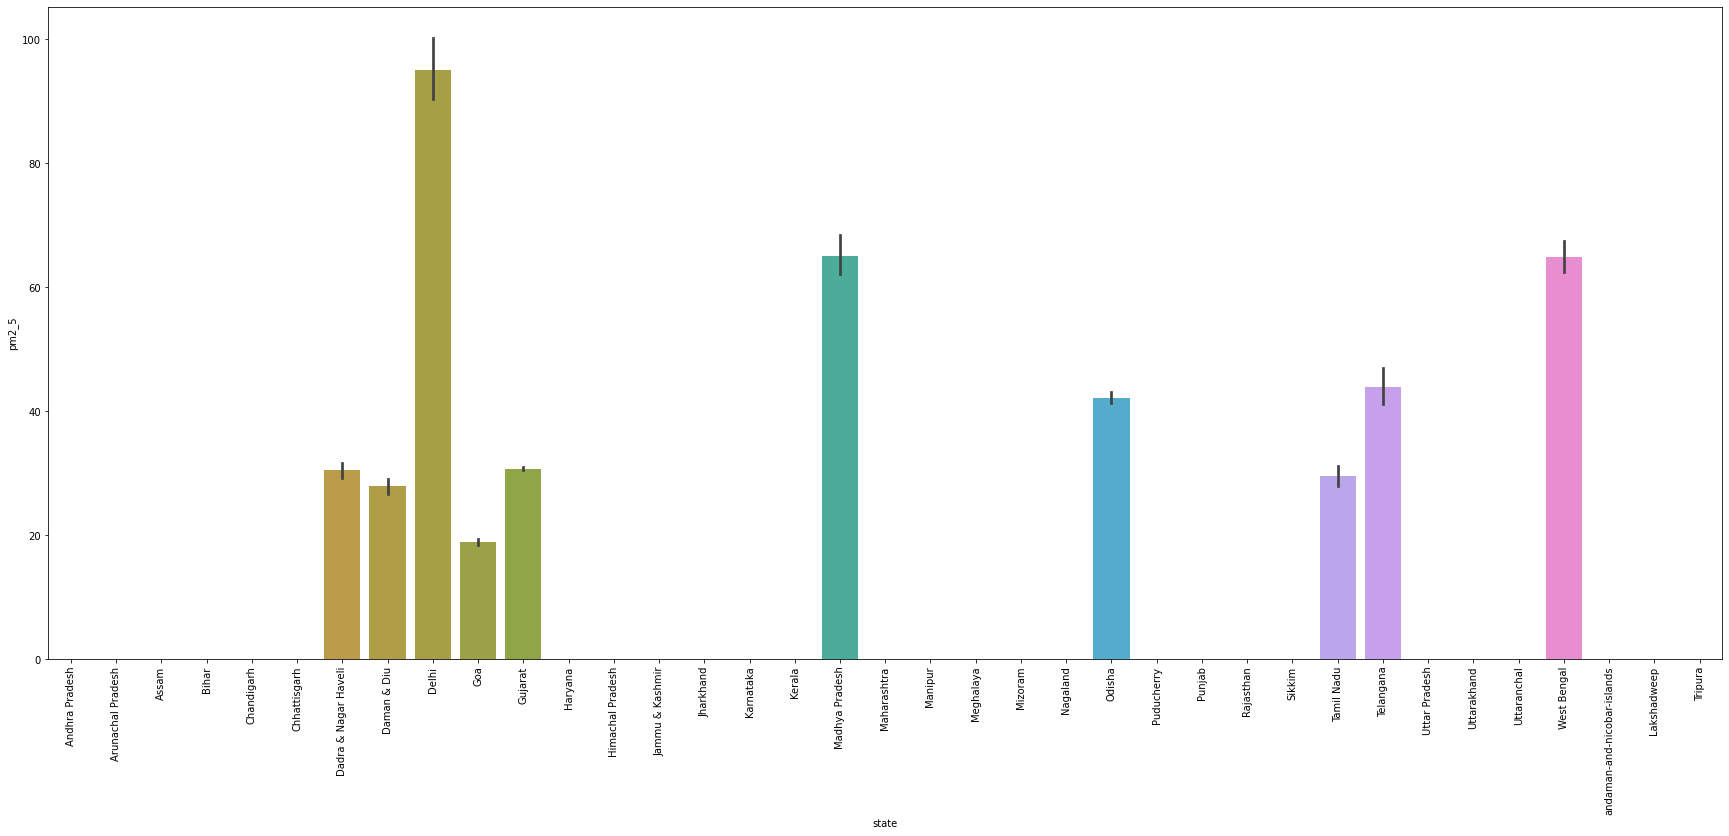

In [29]:
plt.figure(figsize=(30, 12))

plt.xticks(rotation=90)

sns.barplot(x='state',y='pm2_5',data=data)

# Delhi has higher pm2_5 level compared to other states 

##### Checking all null values and cleaning those null values.


In [30]:
null_val = data.isnull().sum().sort_values(ascending=False)

In [31]:
null_val

# check all null values

pm2_5                          426428
spm                            237387
agency                         149481
stn_code                       144077
rspm                            40222
so2                             34646
location_monitoring_station     27491
no2                             16233
type                             5393
date                                7
sampling_date                       3
location                            3
state                               0
dtype: int64

In [32]:
#  higher null values present in pm2_5 followed by spm

In [33]:
null_val_percentage = ((data.isnull().sum())/(data.isnull().count())*100).sort_values(ascending=False)

In [34]:
null_val_percentage

pm2_5                          97.862497
spm                            54.478797
agency                         34.304933
stn_code                       33.064749
rspm                            9.230692
so2                             7.951035
location_monitoring_station     6.309009
no2                             3.725370
type                            1.237659
date                            0.001606
sampling_date                   0.000688
location                        0.000688
state                           0.000000
dtype: float64

In [35]:
missing_data_with_percentage = pd.concat([null_val,null_val_percentage],axis=1,keys=['Total','Percent'])

# Concatenating total null values and their percentage of missing values
# for further imputation or column deletion

In [36]:
print(missing_data_with_percentage)

                              Total    Percent
pm2_5                        426428  97.862497
spm                          237387  54.478797
agency                       149481  34.304933
stn_code                     144077  33.064749
rspm                          40222   9.230692
so2                           34646   7.951035
location_monitoring_station   27491   6.309009
no2                           16233   3.725370
type                           5393   1.237659
date                              7   0.001606
sampling_date                     3   0.000688
location                          3   0.000688
state                             0   0.000000


In [37]:
data.drop(['agency'],axis=1,inplace=True)

data.drop(['stn_code'],axis=1,inplace=True)

data.drop(['date'],axis=1,inplace=True)

data.drop(['sampling_date'],axis=1,inplace=True)

data.drop(['location_monitoring_station'],axis=1,inplace=True)

# Dropping unnecessary columns

In [38]:
data.isnull().sum()

# Now checking the null values

state            0
location         3
type          5393
so2          34646
no2          16233
rspm         40222
spm         237387
pm2_5       426428
dtype: int64

In [39]:
data


,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,NaN,NaN
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,NaN,NaN
435739,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# Null value Imputation for categorical data


data['location'] =data['location'] .fillna(data['location'] .mode()[0])

data['type']=data['type'].fillna(data['type'].mode()[0])

In [41]:
data.fillna(0,inplace=True)

In [42]:
data.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
dtype: int64

In [43]:
# Now we have successfully imputed null values which were present in the dataset

In [44]:
data

# The following features are important for our machine learning models.

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,0.0,0.0
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,0.0,0.0
435739,andaman-and-nicobar-islands,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0
435740,Lakshadweep,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0


Calculate Air quality index for so2 based on formula

Function to calculate so2 individual pollutant index(si)

In [45]:
def cal_SOi(so2):
    
    si=0
    
    if (so2<=40):
        si= so2*(50/40)
    elif (so2>40 and so2<=80):
        si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
        si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
        si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
        si= 300+(so2-800)*(100/800)
    elif (so2>1600):
        si= 400+(so2-1600)*(100/800)
    return si


data['SOi']=data['so2'].apply(cal_SOi)

data1= data[['so2','SOi']]

data1.head()

# calculating the individual pollutant index for so2(sulphur dioxide)

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


Function to calculate no2 individual pollutant index(ni)

In [46]:
def cal_Noi(no2):
    
    ni=0
    
    if(no2<=40):
        ni= no2*50/40
    elif(no2>40 and no2<=80):
        ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
        ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
        ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
        ni= 300+(no2-280)*(100/120)
    else:
        ni= 400+(no2-400)*(100/120)
    return ni


data['Noi']=data['no2'].apply(cal_Noi)

data2= data[['no2','Noi']]
data2.head()
# calculating the individual pollutant index for no2(nitrogen dioxide)

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


Function to calculate rspm individual pollutant index(rpi)

In [47]:
def cal_RSPMI(rspm):
    
    rpi=0
    
    if(rpi<=30):
        rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
        rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
        rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
        rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
        rpi=300+(rpi-120)*(100/130)
    else:
        rpi=400+(rpi-250)*(100/130)
    return rpi

data['Rpi']=data['rspm'].apply(cal_RSPMI)

data3= data[['rspm','Rpi']]

data3.head()

# calculating the individual pollutant index for rspm(respirable suspended particualte matter concentration)

,rspm,Rpi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


Function to calculate spm individual pollutant index(spi)

In [48]:
def cal_SPMi(spm):
    
    spi=0
    
    if(spm<=50):
        spi=spm*50/50
    elif(spm>50 and spm<=100):
        spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
        spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
        spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
        spi=300+(spm-350)*(100/80)
    else:
        spi=400+(spm-430)*(100/430)
    return spi

   
data['SPMi']=data['spm'].apply(cal_SPMi)

data4= data[['spm','SPMi']]

data4.head()

# calculating the individual pollutant index for spm(suspended particulate matter)

,spm,SPMi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


function to calculate the air quality index (AQI) of every data value

In [49]:
def cal_aqi(si,ni,rspmi,spmi):
    
    aqi=0
    
    if(si>ni and si>rspmi and si>spmi):
        aqi=si
    if(ni>si and ni>rspmi and ni>spmi):
        aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi):
        aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
        aqi=spmi
    return aqi


data['AQI']=data.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['Rpi'],x['SPMi']),axis=1)

data5= data[['state','SOi','Noi','Rpi','SPMi','AQI']]
data5.head()

# Caluclating the Air Quality Index.

,state,SOi,Noi,Rpi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


In [50]:
def AQI_Range(x):
    
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"
    

data['AQI_Range'] = data['AQI'] .apply(AQI_Range)
data.head()
# Using threshold values to classify a particular values as good, moderate,
# poor, unhealthy, very unhealthy and Hazardous


,state,location,type,so2,no2,rspm,spm,pm2_5,SOi,Noi,Rpi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,6.000,21.750,0.0,0.0,21.750,Good
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,3.875,8.750,0.0,0.0,8.750,Good
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,7.750,35.625,0.0,0.0,35.625,Good
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,7.875,18.375,0.0,0.0,18.375,Good
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,5.875,9.375,0.0,0.0,9.375,Good


In [51]:
data['AQI_Range'].value_counts()

# These are the counts of values present in the AQI_Range column.

Good              219643
Poor               93272
Moderate           56571
Unhealthy          31733
Hazardous          18700
Very unhealthy     15823
Name: AQI_Range, dtype: int64

Splitting the dataset into Dependent and Independent columns

In [52]:
X=data[['SOi','Noi','Rpi','SPMi']]

Y=data['AQI']

X.head()
# we only select columns like soi, noi, rpi, spmi

,SOi,Noi,Rpi,SPMi
0,6.000,21.750,0.0,0.0
1,3.875,8.750,0.0,0.0
2,7.750,35.625,0.0,0.0
3,7.875,18.375,0.0,0.0
4,5.875,9.375,0.0,0.0


In [53]:
Y.head()

# the AQI column is the target column

0    21.750
1     8.750
2    35.625
3    18.375
4     9.375
Name: AQI, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

print(X_train.shape,X_test.shape)

print(Y_train.shape,Y_test.shape)

# splitting the data into training and testing data

(348593, 4) (87149, 4)
(348593,) (87149,)


Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
lr=LinearRegression()

lr.fit(X_train,Y_train)

LinearRegression()

In [58]:
#predicting train
train_pred=lr.predict(X_train)

#predicting on test
test_pred=lr.predict(X_test)

In [59]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [60]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))

RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))

print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))

print('_'*70)
print(' ')

print('RSquared value on train:',lr.score(X_train, Y_train))
print('RSquared value on test:',lr.score(X_test, Y_test))

RMSE TrainingData =  13.614216505848312
RMSE TestData =  13.549734213668252
______________________________________________________________________
 
RSquared value on train: 0.9848923021329813
RSquared value on test: 0.9849731985310131


Decision Tree Regressor

In [61]:
from sklearn.tree import DecisionTreeRegressor

In [62]:
dt=DecisionTreeRegressor()

dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [63]:
#predicting train
train_preds=dt.predict(X_train)

#predicting on test
test_preds=dt.predict(X_test)

In [64]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))

RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))

print("RMSE TrainingData = ",str(RMSE_train))

print("RMSE TestData = ",str(RMSE_test))

print('_'*70)
print(' ')

print('RSquared value on train:',dt.score(X_train, Y_train))
print('RSquared value on test:',dt.score(X_test, Y_test))

RMSE TrainingData =  2.3354928993347327e-13
RMSE TestData =  1.333264999378769
______________________________________________________________________
 
RSquared value on train: 1.0
RSquared value on test: 0.9998545083891077


Random Forest Regressor

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
rf=RandomForestRegressor().fit(X_train,Y_train)

In [67]:
#predicting train
train_preds1=rf.predict(X_train)

#predicting on test
test_preds1=rf.predict(X_test)

In [68]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))

print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))

print('_'*70)
print(' ')

print('RSquared value on train:',rf.score(X_train, Y_train))
print('RSquared value on test:',rf.score(X_test, Y_test))

RMSE TrainingData =  0.4121896635001272
RMSE TestData =  1.2531538639310502
______________________________________________________________________
 
RSquared value on train: 0.999986151358312
RSquared value on test: 0.9998714672525132


##### Classification Algorithms

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [70]:
X2 = data[['SOi','Noi','Rpi','SPMi']]
Y2 = data['AQI_Range']

# Splitting the data into independent and dependent columns for classification 

In [71]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.33, random_state=42)

# Splitting the data into training and testing data 

Logistic Regression

In [72]:
#fit the model on train data 
log_reg = LogisticRegression().fit(X_train2, Y_train2)

In [73]:
#predict on train 
train_preds2 = log_reg.predict(X_train2)

In [74]:
#predict on test
test_preds2 = log_reg.predict(X_test2)

In [75]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [76]:

#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds2))


#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds2))

print('_'*70)
print(' ')


# Kappa Score.
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds2))

Model accuracy on train is:  0.7373084840741642
Model accuracy on test is:  0.738467957856671
______________________________________________________________________
 
KappaScore is:  0.6042804630782568


In [77]:
log_reg.predict([[7,33.24,1.8,2.4]]) 

array(['Good'], dtype=object)

In [78]:
log_reg.predict([[700,332.4,38,152]]) 

array(['Unhealthy'], dtype=object)

In [79]:
log_reg.predict([[55,600,111,352]]) 

array(['Moderate'], dtype=object)

In [80]:
log_reg.predict([[2.7,45,35.16,23]]) 

array(['Moderate'], dtype=object)

Decision Tree Classifier

In [81]:
#fit the model on train data 
dt2 = DecisionTreeClassifier().fit(X_train2,Y_train2)

#predict on train 
train_preds3 = dt2.predict(X_train2)

#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds3))



#predict on test
test_preds3 = dt2.predict(X_test2)

#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds3))


print('_'*70)
print(' ')



# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds3))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9998122326923745
______________________________________________________________________
 
KappaScore is:  0.9997211959429761


Random Forest Classifier

In [82]:
rfc=RandomForestClassifier().fit(X_train2,Y_train2)

In [83]:
#predict on train 

train_preds4 = rfc.predict(X_train2)

In [84]:
#predict on test

test_preds4 = rfc.predict(X_test2)

In [85]:
#accuracy on train

print("Model accuracy on train set is: ", accuracy_score(Y_train2, train_preds4))



#accuracy on test

print("Model accuracy on test set is: ", accuracy_score(Y_test2, test_preds4))



print('_'*70)

# Kappa Score

print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds4))

Model accuracy on train set is:  1.0
Model accuracy on test set is:  0.9997705066240133
______________________________________________________________________
KappaScore is:  0.9996592442783907


K-Nearest Neighbours

In [86]:
#fit the model on train data 

KNN = KNeighborsClassifier().fit(X_train2,Y_train2)

In [87]:
#predict on train 
train_preds5 = KNN.predict(X_train2)


#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds5))




#predict on test
test_preds5 = KNN.predict(X_test2)


#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds5))




print('_'*70)



# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds5))

Model accuracy on train is:  0.9981640503242026
Model accuracy on test is:  0.9969192252859974
______________________________________________________________________
KappaScore is:  0.9954250356990302


In [88]:
# predict on random values

KNN.predict([[17.9,67.5,99.172,115]]) 

array(['Poor'], dtype=object)

In [89]:
KNN.predict([[1.5,11.3,13.19,0.5]]) 

array(['Good'], dtype=object)

In [90]:
KNN.predict([[300.25,357,689.364,188]]) 

array(['Very unhealthy'], dtype=object)